# FY19 Bid trends - Assignment 1

Data and Setup

In [75]:
import numpy as np
import pandas as pd

Importing visualzation library

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Reading the csv file as a dataframe

In [77]:
df = pd.read_csv('FY19_BID_Trends_Report_Data.csv')

Checking information of the dataframe using info() function

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 47 columns):
company                                                              75 non-null object
Floor Size (square feet)                                             75 non-null int64
Full-time staff                                                      75 non-null int64
Sanitation staff employed                                            75 non-null float64
Safety Inspector                                                     75 non-null int64
Part-time staff                                                      75 non-null int64
Current clients                                                      75 non-null object
Bid provides supplemental sanitation services                        75 non-null object
Types of duties assigned to sanitation workers                       73 non-null object
Days per week of sanitation services                                 72 non-null float64
Hours logged by san

To show all columns, we use None

In [79]:
pd.set_option('display.max_columns', None)

Checking the head of dataframe

In [80]:
df.head(5)

,company,Floor Size (square feet),Full-time staff,Sanitation staff employed,Safety Inspector,Part-time staff,Current clients,Bid provides supplemental sanitation services,Types of duties assigned to sanitation workers,Days per week of sanitation services,Hours logged by sanitation workers,Incidents of graffiti removed,Trash bags collected,Trash and recycling receptacles serviced,Bid provides supplemental public safety services,Duties assigned to public safety personnel,Hours logged by public safety officers,Interactions with public safety officers,Bid provides supplemental streetscape and beautification services,Planters and hanging baskets maintained,Tree pits maintained,Banners maintained,Public art installations sponsored,Street furniture elements maintained,Wayfinding elements maintained,Lighting elements maintained,Other infrastructure elements maintained,Public spaces maintained,Bid has holiday lighting program,Communication channels used,Social media followers,Marketing materials distributed,Public events coordinated,Estimated attendees to public events coordinated,Special event charges,Miscellaneous charges,Sanitation expenses,Public safety expenses,"Marketing, holiday lighting, and special event expenses",Streetscape & beautification expenses,Salaries,Outside contractor expenses,Insurance costs,Rent and utilities,Supplies and equipment costs,Other G&A expenses,Total Quotation
0,Kreiger and Sons,10270,3,6.0,4,7,220,Yes,Street Sweeping and Bagging; Snow and Ice Remo...,6.0,12699.0,"15,085",73500.0,60.0,Yes,Street patrol; Coordination with NYPD,9875.0,1438.0,Yes,0.0,27.0,64.0,0.0,155,0,64,0,0.0,Yes,Print advertising (i.e. local newspaper); Digi...,11646,31300,2,121280,"$32,700",$-,305846.0,212483.0,"$130,351",NaN,303350.0,22813.0,27852.0,134002.0,NaN,58140.0,1064486
1,Ziemann and Sons,5220,1,2.0,4,2,145,Yes,Street Sweeping and Bagging; Snow and Ice Remo...,7.0,4488.0,915,42000.0,48.0,No,NaN,NaN,NaN,Yes,0.0,20.0,12.0,16.0,15,6,0,20,2.0,Yes,Direct mailings; Flyers; Email bulletins; Soci...,0,6500,16,61000,"$35,000",$-,119258.0,NaN,"$29,875",11383.0,137000.0,6000.0,8071.0,8500.0,5000.0,5000.0,300212
2,"Runolfsdottir, Hauck and Little",1740,1,3.0,0,0,168,Yes,Street Sweeping and Bagging; Power Washing; Sn...,7.0,3240.0,6,1120.0,29.0,Yes,Street patrol,80.0,0.0,Yes,0.0,20.0,0.0,4.0,0,2,29,0,0.0,Yes,Print advertising (i.e. local newspaper); Dire...,0,35100,38,15500,$-,"$2,400",68630.0,NaN,"$39,151",12905.0,61885.0,19312.0,44796.0,9060.0,5000.0,2962.0,224550
3,"Braun, Rowe and Price",8150,1,0.0,4,0,42,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Street patrol; Coordination with NYPD,180.0,30.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Direct mailings; Door-to-door visits; Flyers; ...,0,250,3,40,$-,$-,NaN,18396.0,"$1,850",18475.0,16000.0,6800.0,3005.0,2400.0,2000.0,1542.0,68618
4,Cormier and Sons,41110,62,66.0,34,13,I don't know,Yes,Street Sweeping and Bagging; Power Washing; Sn...,7.0,135200.0,"3,677",255500.0,349.0,Yes,Street patrol; Coordination with NYPD,43909.0,2801.0,Yes,700.0,140.0,181.0,0.0,1228,1049,683,623,4.0,No,"Digital advertising (i.e. Google, Facebook, In...",19700,10025,333,6150,$-,"$2,584",3975551.0,2668152.0,"$442,386",2175000.0,901393.0,66271.0,67009.0,102285.0,12220.0,147067.0,10114948


To check the datatypes of various attributes in dataset

In [81]:
df.dtypes

company                                                               object
Floor Size (square feet)                                               int64
Full-time staff                                                        int64
Sanitation staff employed                                            float64
Safety Inspector                                                       int64
Part-time staff                                                        int64
Current clients                                                       object
Bid provides supplemental sanitation services                         object
Types of duties assigned to sanitation workers                        object
Days per week of sanitation services                                 float64
Hours logged by sanitation workers                                   float64
Incidents of graffiti removed                                         object
Trash bags collected                                                 float64

In [82]:
df.shape

(75, 47)

Is there any missing value in dataset, if yes how many?

In [83]:
df.isnull().values.any()
df.isnull().sum()

company                                                               0
Floor Size (square feet)                                              0
Full-time staff                                                       0
Sanitation staff employed                                             0
Safety Inspector                                                      0
Part-time staff                                                       0
Current clients                                                       0
Bid provides supplemental sanitation services                         0
Types of duties assigned to sanitation workers                        2
Days per week of sanitation services                                  3
Hours logged by sanitation workers                                    3
Incidents of graffiti removed                                         3
Trash bags collected                                                  3
Trash and recycling receptacles serviced                        

Importing Simple Imputer

In [84]:
from sklearn.impute import SimpleImputer

In [85]:
type(df['Hours logged by public safety officers'].iloc[0])

numpy.float64

# Pre-processing

<b>Feature Identification and grouping </b><br>
1. Merging the staff column and creating a new column called Total_Staff

In [86]:
df['Total_Staff'] = df['Full-time staff'] + df['Sanitation staff employed'] + df['Safety Inspector'] + df['Part-time staff']

In [87]:
df['Total_Staff'] #viewing and verifying total staff

0      20.00
1       9.00
2       4.00
3       5.00
4     175.00
5       5.00
6       7.00
7       5.00
8       7.00
9      14.00
10     22.00
11      8.00
12      5.00
13    141.00
14     26.00
15      5.00
16      5.00
17     14.00
18      8.00
19      8.00
20    202.00
21     12.00
22     24.00
23      7.00
24     55.00
25      8.00
26     40.00
27      8.00
28      6.00
29     38.00
       ...  
45     10.00
46     12.00
47     27.00
48     19.00
49     38.00
50     11.00
51      7.00
52      8.00
53      9.00
54      7.00
55      9.00
56      1.00
57      6.25
58     14.00
59     10.00
60      5.00
61      2.00
62      3.00
63      7.00
64      8.00
65      6.00
66      4.00
67     13.00
68    169.00
69     34.00
70     20.00
71      7.00
72     10.00
73      8.00
74      5.00
Name: Total_Staff, Length: 75, dtype: float64

In [88]:
df.drop(['Full-time staff','Sanitation staff employed','Safety Inspector','Part-time staff'],axis=1,inplace=True) #dropping the columns

In [89]:
df.shape

(75, 44)

2. Merging the Services provided column

In [90]:
df['Services_Provided'] = df['Types of duties assigned to sanitation workers'] + ";" + df['Duties assigned to public safety personnel']

In [91]:
df['Services_Provided']

0     Street Sweeping and Bagging; Snow and Ice Remo...
1                                                   NaN
2     Street Sweeping and Bagging; Power Washing; Sn...
3                                                   NaN
4     Street Sweeping and Bagging; Power Washing; Sn...
5                                                   NaN
6                                                   NaN
7                                                   NaN
8     Street Sweeping and Bagging; Snow and Ice Remo...
9                                                   NaN
10    Street Sweeping and Bagging; Power Washing; Sn...
11    Street Sweeping and Bagging; Power Washing; Sn...
12                                                  NaN
13    Street Sweeping and Bagging; Power Washing; Sn...
14                                                  NaN
15                                                  NaN
16                                                  NaN
17    Street Sweeping and Bagging; Snow and Ice 

In [92]:
df.drop(['Types of duties assigned to sanitation workers','Duties assigned to public safety personnel'],axis=1,inplace=True)

3. Prdicting null values data using simple impute from scikit, using "mean" strategy

In [93]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df[['Hours logged by public safety officers']])
df['Hours logged by public safety officers'] = imr.transform(df[['Hours logged by public safety officers']]).ravel()


#Hours logged by public safety officers                               37

In [94]:
df['Hours logged by public safety officers']

0       9875.000000
1      17372.572368
2         80.000000
3        180.000000
4      43909.000000
5      17372.572368
6      17372.572368
7      17372.572368
8       2080.000000
9      17372.572368
10       549.000000
11      5312.000000
12     17372.572368
13     24040.000000
14     17372.572368
15     17372.572368
16     17372.572368
17         0.000000
18      4160.000000
19     16676.000000
20    122596.000000
21     17372.572368
22     17372.572368
23     17372.572368
24     14566.000000
25        78.000000
26     45000.000000
27      2898.000000
28       240.000000
29     16510.000000
          ...      
45       500.000000
46     17372.572368
47     27040.000000
48      6240.000000
49     45760.000000
50     17372.572368
51         4.000000
52     17372.572368
53     17372.572368
54     17372.572368
55     17372.572368
56     17372.572368
57     17372.572368
58     17372.572368
59       910.000000
60       104.000000
61     17372.572368
62       225.000000
63       100.000000


3. Replacing ",", Nan and - with respective values

In [95]:
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].str.replace(",","")

In [96]:
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].str.replace("-","0")

In [97]:
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].fillna("0")

In [98]:
print(df['Incidents of graffiti removed'])

0     15085
1       915
2         6
3         0
4      3677
5       226
6         0
7       168
8      5400
9        72
10     3842
11       58
12       12
13      107
14     3105
15     1683
16     1500
17      400
18      780
19     2550
20     2096
21      580
22      275
23        0
24      675
25     2125
26      200
27     2015
28       44
29    20282
      ...  
45      111
46     3062
47     5247
48     1021
49     1560
50       22
51      120
52      246
53       67
54        1
55     8908
56      630
57     1117
58       80
59     1574
60        0
61        0
62       62
63     4525
64    13712
65      150
66        3
67       83
68     2235
69    17892
70     8446
71     1375
72        0
73       39
74      150
Name: Incidents of graffiti removed, Length: 75, dtype: object


4. Number Of Sanitation Activities - Using astype("float") to convert to float

In [99]:
df['Number_Of_Sanitation_Activities'] = df['Incidents of graffiti removed'].astype("float") + df['Trash bags collected'] + df['Trash and recycling receptacles serviced']

In [100]:
print(df['Number_Of_Sanitation_Activities'])

0      88645.0
1      42963.0
2       1155.0
3          NaN
4     259526.0
5       9441.0
6      57039.0
7      18728.0
8      41484.0
9       2342.0
10     29658.0
11     18328.0
12      8064.0
13     89302.0
14     96146.0
15     66723.0
16     26080.0
17     17428.0
18     73888.0
19     12064.0
20    138762.0
21     90660.0
22     38810.0
23      1382.0
24    141591.0
25     74740.0
26     62278.0
27     80087.0
28     20980.0
29    205783.0
        ...   
45     46515.0
46     24088.0
47    106556.0
48     52939.0
49    147719.0
50        66.0
51     49097.0
52     45337.0
53     78628.0
54       121.0
55     72368.0
56     15409.0
57     26819.0
58      7448.0
59     48690.0
60      3020.0
61         NaN
62      4941.0
63     84311.0
64     44199.0
65     36756.0
66     25020.0
67      8287.0
68    185135.0
69    208887.0
70     94554.0
71     61650.0
72      1205.0
73     10562.0
74     78270.0
Name: Number_Of_Sanitation_Activities, Length: 75, dtype: float64


Dropping the not needed columns


In [101]:
df.drop(['Incidents of graffiti removed','Trash bags collected','Trash and recycling receptacles serviced'],axis=1,inplace=True)

5. Merging all Number of Beautification activities

In [102]:
df['Beautification_Activities'] = df['Planters and hanging baskets maintained'] + df['Tree pits maintained'] + df['Banners maintained'] + df['Public art installations sponsored'] + (df['Street furniture elements maintained']).convert_objects(convert_numeric=True) 
+ (df['Wayfinding elements maintained']).convert_objects(convert_numeric=True)
+ (df['Lighting elements maintained']).convert_objects(convert_numeric=True) + (df['Other infrastructure elements maintained']).convert_objects(convert_numeric=True) + df['Public spaces maintained']                          
 
                                                    

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we c

0       64.0
1       22.0
2       29.0
3        NaN
4     1310.0
5       78.0
6        1.0
7      340.0
8        NaN
9        7.0
10      51.0
11       NaN
12       NaN
13     379.0
14    1554.0
15       NaN
16     148.0
17      39.0
18       NaN
19      37.0
20       NaN
21       2.0
22       4.0
23       1.0
24     601.0
25      37.0
26       NaN
27       NaN
28       NaN
29      97.0
       ...  
45      40.0
46     119.0
47      54.0
48     230.0
49     109.0
50      20.0
51      28.0
52     123.0
53     110.0
54      42.0
55      53.0
56       NaN
57       1.0
58       2.0
59       NaN
60       1.0
61       NaN
62      16.0
63      33.0
64     112.0
65       0.0
66       NaN
67      17.0
68     252.0
69       NaN
70     152.0
71       NaN
72       5.0
73       1.0
74       1.0
Length: 75, dtype: float64

Removing unnecessary columns of beautification activities

In [103]:
df.drop(['Planters and hanging baskets maintained','Tree pits maintained','Banners maintained','Public art installations sponsored','Street furniture elements maintained','Wayfinding elements maintained','Lighting elements maintained','Other infrastructure elements maintained','Public spaces maintained'],axis=1,inplace=True)

In [104]:
df.shape

(75, 33)

6. Replacing Null values of Beautification activities with 0

In [105]:
df['Beautification_Activities'] = df['Beautification_Activities'].fillna("0")

In [106]:
print(df['Beautification_Activities'])

0      246
1       63
2       24
3        0
4     2249
5      103
6       67
7      395
8      315
9      112
10     154
11     101
12       0
13    5186
14     434
15       0
16     180
17     215
18     626
19      21
20       0
21     168
22     259
23      35
24     160
25     306
26       0
27       0
28       0
29     810
      ... 
45     406
46     340
47     103
48     301
49     985
50     120
51      37
52     307
53     468
54     195
55      71
56     175
57      50
58      66
59       0
60      98
61       0
62      36
63     138
64     247
65      32
66       0
67      89
68    1112
69    1153
70     462
71       0
72      71
73     123
74     109
Name: Beautification_Activities, Length: 75, dtype: object


7. Calculating Total media reach of the company

In [107]:
df['Media_Reach'] = df['Social media followers'] + df['Marketing materials distributed'] + (df['Public events coordinated']*df['Estimated attendees to public events coordinated'])      
#media_reach column made by Social media followers'] + df['Marketing materials distributed'] + 
#(df['Public events coordinated']*df['Estimated attendees to public events coordinated'])      

                                            

In [108]:
df.drop(['Social media followers','Marketing materials distributed','Public events coordinated','Estimated attendees to public events coordinated'],axis=1,inplace=True)

In [109]:
print(df['Media_Reach'])

0         285506
1         982500
2         624100
3            370
4        2077675
5          87801
6           6100
7          18035
8         531077
9          38874
10         74260
11        750463
12         12000
13     839811400
14      34856395
15         71704
16        128799
17        194916
18         35532
19         98000
20       2129275
21        305044
22      12695650
23          8678
24        120522
25        211849
26             0
27        301654
28         17150
29        774249
         ...    
45        115064
46      12445404
47         50355
48        462899
49       1287192
50         44000
51         16558
52        353770
53       7911665
54        220850
55          4808
56        108764
57       2160235
58         65900
59          2569
60         31767
61            20
62        123491
63         52685
64        747800
65        612500
66        143278
67       5613264
68    3262248374
69       4749346
70        296623
71         27800
72           1

In [110]:
df.head(1)

,company,Floor Size (square feet),Current clients,Bid provides supplemental sanitation services,Days per week of sanitation services,Hours logged by sanitation workers,Bid provides supplemental public safety services,Hours logged by public safety officers,Interactions with public safety officers,Bid provides supplemental streetscape and beautification services,Bid has holiday lighting program,Communication channels used,Special event charges,Miscellaneous charges,Sanitation expenses,Public safety expenses,"Marketing, holiday lighting, and special event expenses",Streetscape & beautification expenses,Salaries,Outside contractor expenses,Insurance costs,Rent and utilities,Supplies and equipment costs,Other G&A expenses,Total Quotation,Total_Staff,Services_Provided,Number_Of_Sanitation_Activities,Beautification_Activities,Media_Reach
0,Kreiger and Sons,10270,220,Yes,6.0,12699.0,Yes,9875.0,1438.0,Yes,Yes,Print advertising (i.e. local newspaper); Digi...,"$32,700",$-,305846.0,212483.0,"$130,351",NaN,303350.0,22813.0,27852.0,134002.0,NaN,58140.0,1064486,20.0,Street Sweeping and Bagging; Snow and Ice Remo...,88645.0,246,285506


In [111]:
df.drop(['Special event charges',
         'Miscellaneous charges',
         'Sanitation expenses',
         'Public safety expenses',
         'Marketing, holiday lighting, and special event expenses',
         'Streetscape & beautification expenses',
         'Salaries',
         'Outside contractor expenses',
         'Insurance costs',
         'Rent and utilities',
         'Supplies and equipment costs',
        'Other G&A expenses'],axis=1,inplace=True)


#Removing unnecessary event charges by the company

In [112]:
df.shape

(75, 18)

# Corellation and modeling

In [113]:
df.head(2)

,company,Floor Size (square feet),Current clients,Bid provides supplemental sanitation services,Days per week of sanitation services,Hours logged by sanitation workers,Bid provides supplemental public safety services,Hours logged by public safety officers,Interactions with public safety officers,Bid provides supplemental streetscape and beautification services,Bid has holiday lighting program,Communication channels used,Total Quotation,Total_Staff,Services_Provided,Number_Of_Sanitation_Activities,Beautification_Activities,Media_Reach
0,Kreiger and Sons,10270,220,Yes,6.0,12699.0,Yes,9875.000000,1438.0,Yes,Yes,Print advertising (i.e. local newspaper); Digi...,1064486,20.0,Street Sweeping and Bagging; Snow and Ice Remo...,88645.0,246,285506
1,Ziemann and Sons,5220,145,Yes,7.0,4488.0,No,17372.572368,NaN,Yes,Yes,Direct mailings; Flyers; Email bulletins; Soci...,300212,9.0,NaN,42963.0,63,982500


corr() function 
to find the correlation between two columns


In [114]:
df['Total_Staff'].corr(df['Total Quotation'])

#Corellation between Total_Staff  and Total Quotation by company

0.9583520296537363

Heatmap showing the corellation of attributes using seaborn library


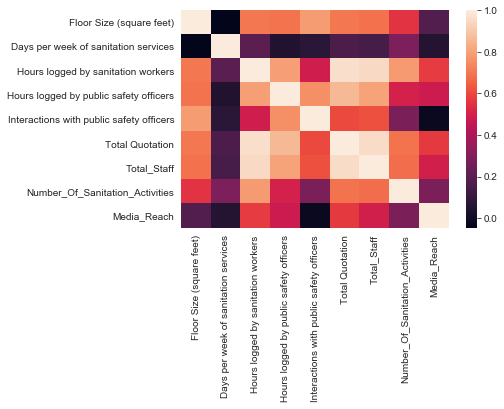

In [115]:
a = df.corr()
sns.heatmap(a)

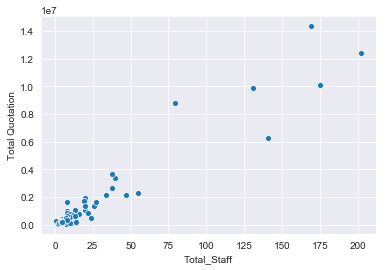

In [116]:
#b= df['Total_Staff'].corr(df['Total Quotation'])
sns.scatterplot(x=df['Total_Staff'], y=df['Total Quotation'])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


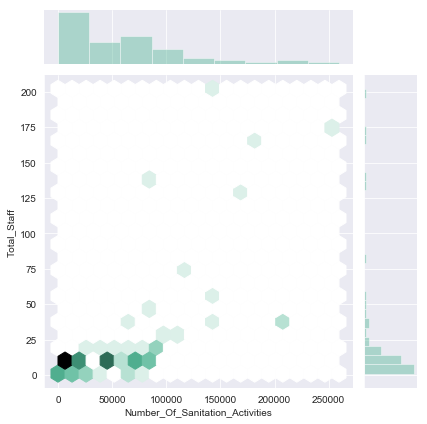

In [117]:
sns.jointplot(x=df["Number_Of_Sanitation_Activities"], y=df["Total_Staff"], kind="hex", color="#4CB391")

Loosely related attributes

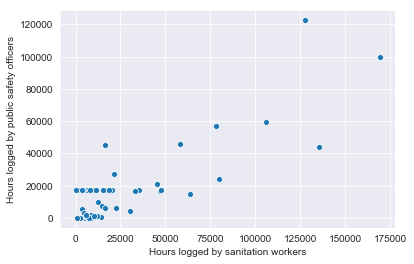

In [118]:
sns.scatterplot(x=df['Hours logged by sanitation workers'], y=df['Hours logged by public safety officers'])

Linear Regression<br>
Applied method of linear regression on the present dataset

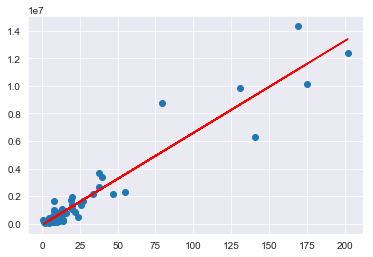

In [119]:
from sklearn.linear_model import LinearRegression
X = df['Total_Staff'].values.reshape(-1, 1)
Y = df['Total Quotation'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)
reg.coef_
reg.intercept_
#reg.predict(X,Y)
Y_pred = reg.predict(X)
plt.scatter(X, Y)
plt.plot(X,Y_pred, color='red')


In [120]:
df.columns


Index(['company', 'Floor Size (square feet)', 'Current clients',
       'Bid provides supplemental sanitation services',
       'Days per week of sanitation services',
       'Hours logged by sanitation workers',
       'Bid provides supplemental public safety services',
       'Hours logged by public safety officers',
       'Interactions with public safety officers',
       'Bid provides supplemental streetscape and beautification services',
       'Bid has holiday lighting program', 'Communication channels used',
       'Total Quotation', 'Total_Staff', 'Services_Provided',
       'Number_Of_Sanitation_Activities', 'Beautification_Activities',
       'Media_Reach'],
      dtype='object')

In [121]:
df.dtypes

company                                                               object
Floor Size (square feet)                                               int64
Current clients                                                       object
Bid provides supplemental sanitation services                         object
Days per week of sanitation services                                 float64
Hours logged by sanitation workers                                   float64
Bid provides supplemental public safety services                      object
Hours logged by public safety officers                               float64
Interactions with public safety officers                             float64
Bid provides supplemental streetscape and beautification services     object
Bid has holiday lighting program                                      object
Communication channels used                                           object
Total Quotation                                                        int64